In [2]:
import os
import re
import string
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [3]:
# Setup
nltk.download("punkt")
nltk.download("stopwords")

# === Load cleaned data ===
df = pd.read_csv("data/processed/lex_fridman_cleaned.csv")
df['text'] = df['text'].fillna('')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# === Custom stopwords ===
custom_stopwords = set(stopwords.words("english")).union({
    's', 't', 're', 've', 'll', 'm',
    'i', 'me', 'my', 'myself', 'we', 'our', 'ourselves', 'you',
    'your', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they',
    'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am',
    'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have',
    'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a',
    'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as',
    'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about',
    'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in',
    'out', 'on', 'off', 'over', 'under', 'again', 'further',
    'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most',
    'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',
    'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just',
    'don', 'should', 'now'
})


In [5]:
# === Tokenization Function ===
def tokenize(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    tokens = re.findall(r'\b\w+\b', text)
    return [t for t in tokens if t not in custom_stopwords and t not in string.punctuation]


In [6]:
# Apply to all rows
df['tokens'] = df['text'].apply(tokenize)


In [7]:
# === Lexical Stats ===
all_tokens = [t for sublist in df['tokens'] for t in sublist]
total_tokens = len(all_tokens)
unique_tokens = len(set(all_tokens))
lexical_diversity = unique_tokens / total_tokens if total_tokens else 0
avg_token_length = sum(len(t) for t in all_tokens) / total_tokens if total_tokens else 0

print("\n📊 Lexical Summary")
print({
    "Total Tokens": total_tokens,
    "Unique Tokens": unique_tokens,
    "Lexical Diversity": round(lexical_diversity, 4),
    "Average Token Length": round(avg_token_length, 2)
})


📊 Lexical Summary
{'Total Tokens': 3473801, 'Unique Tokens': 50018, 'Lexical Diversity': 0.0144, 'Average Token Length': 5.95}


C:\Users\archa\AppData\Local\Temp\ipykernel_26732\2847504387.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words, x="Frequency", y="Word", palette="viridis")


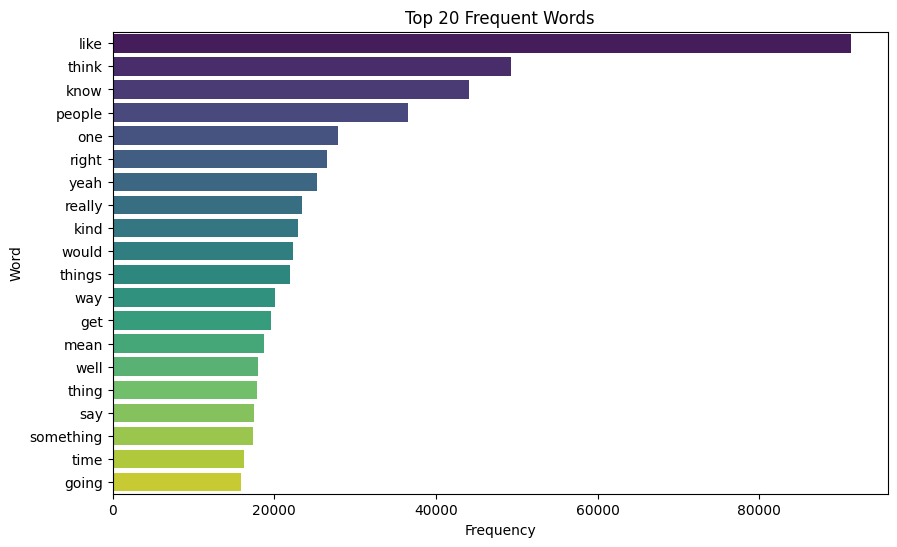

In [8]:
# === Top Words ===
word_counts = Counter(all_tokens)
top_words = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Frequency"])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_words, x="Frequency", y="Word", palette="viridis")
plt.title("Top 20 Frequent Words")
plt.show()

In [9]:
# === Extract Guest Name from Title ===
def extract_guest_name(title):
    if ":" in title:
        parts = title.split(":")[0].split()
        return " ".join(parts[-2:]) if len(parts) >= 2 else title
    return title

df['guest'] = df['title'].apply(extract_guest_name)


In [10]:
# Print all unique guest names (alphabetically sorted)
guest_list = sorted(df['guest'].unique())
print("🎙️ Unique Guests Found:", len(guest_list))
for guest in guest_list:
    print("-", guest)

🎙️ Unique Guests Found: 303
- Abbas Amanat
- Albert Bourla
- Alex Filippenko
- Alex Garland
- Alex Gladstein
- Alexander Fridman
- Alien Debate
- Anca Dragan
- Andrej Karpathy
- Andrew Bustamante
- Andrew Huberman
- Andrew Ng
- Ann Druyan
- Annaka Harris
- Anthony Pompliano
- Anya Fernald
- Ariel Ekblaw
- Avi Loeb
- Ayanna Howard
- Balaji Srinivasan
- Barry Barish
- Ben Askren
- Ben Goertzel
- Ben Shapiro
- Bjarne Stroustrup
- Bobby Lee
- Boris Sofman
- Botez Sisters
- Brendan Eich
- Bret Weinstein
- Brett Johnson
- Brian Armstrong
- Brian Greene
- Brian Keating
- Brian Kernighan
- Brian Muraresku
- Bryan Johnson
- Cal Newport
- Carl Hart
- Chamath Palihapitiya
- Change Debate
- Charles Hoskinson
- Charles Isbell
- Chris Blattman
- Chris Duffin
- Chris Lattner
- Chris Mason
- Chris Tarbell
- Chris Urmson
- Christof Koch
- Christopher Capozzola
- Clara Sousa-Silva
- Coffeezilla: SBF, FTX, Fraud, Scams, Fake Gurus, Money, Fame, and Power | Lex Fridman Podcast #345
- Colin Angle
- Cristia

In [11]:
top_guests = df['guest'].value_counts().head(10)
print("\n📊 Top 10 Most Frequent Guests:\n")
print(top_guests)



📊 Top 10 Most Frequent Guests:

guest
Manolis Kellis      4
Eric Weinstein      4
Michael Malice      4
Andrew Huberman     3
Stephen Wolfram     3
Elon Musk           3
Joe Rogan           2
Chris Lattner       2
François Chollet    2
Vitalik Buterin     2
Name: count, dtype: int64


In [11]:
guest_counts = df['guest'].value_counts()
print(guest_counts.head(10))


guest
Manolis Kellis      4
Eric Weinstein      4
Michael Malice      4
Andrew Huberman     3
Stephen Wolfram     3
Elon Musk           3
Joe Rogan           2
Chris Lattner       2
François Chollet    2
Vitalik Buterin     2
Name: count, dtype: int64


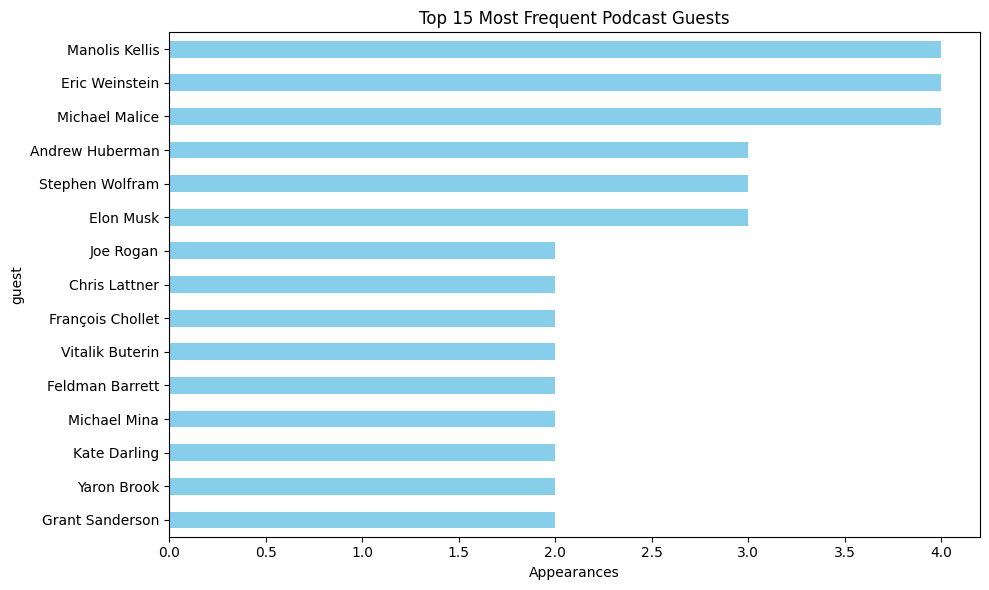

In [12]:
import matplotlib.pyplot as plt

top_guests = guest_counts.head(15)
top_guests.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 15 Most Frequent Podcast Guests")
plt.xlabel("Appearances")
plt.tight_layout()
plt.show()


In [13]:
from collections import Counter
import ast

guest_keywords = {}

for guest in df['guest'].unique():
    tokens = df[df['guest'] == guest]['tokens'].sum()
    guest_keywords[guest] = Counter(tokens).most_common(5)

# Example: Show top 5 words for a guest
guest_keywords.get('Andrew Huberman', [])


[('like', 1024),
 ('people', 579),
 ('think', 550),
 ('know', 466),
 ('really', 364)]

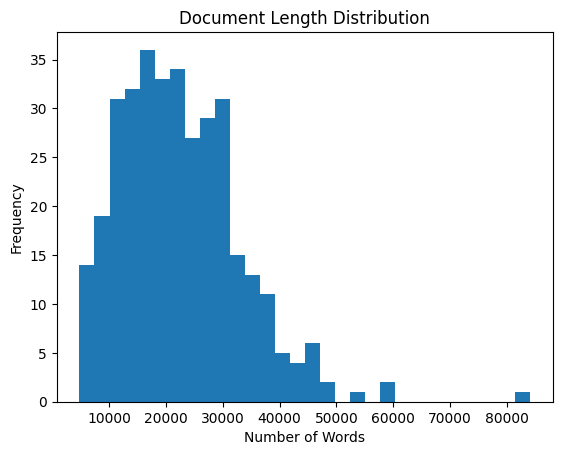

In [14]:
import matplotlib.pyplot as plt
df['doc_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.hist(df['doc_length'], bins=30)
plt.title("Document Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [19]:
print(df.columns)


Index(['id', 'channel', 'channel_id', 'title', 'categories', 'tags',
       'description', 'text', 'segments', 'cleaned_text', 'tokens', 'guest',
       'category_clean', 'doc_length'],
      dtype='object')


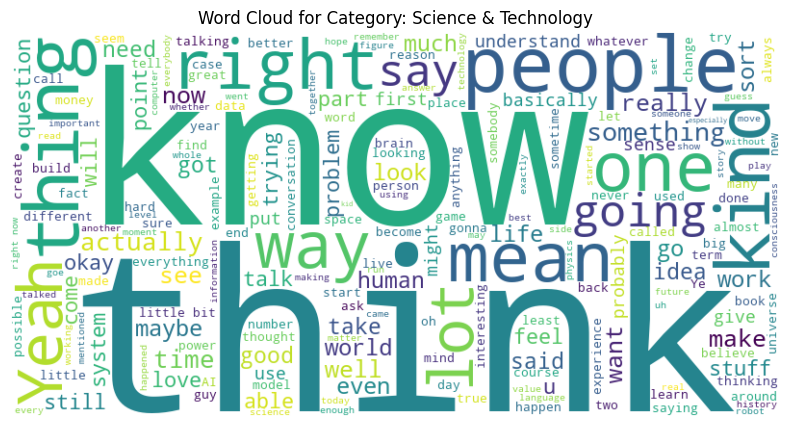

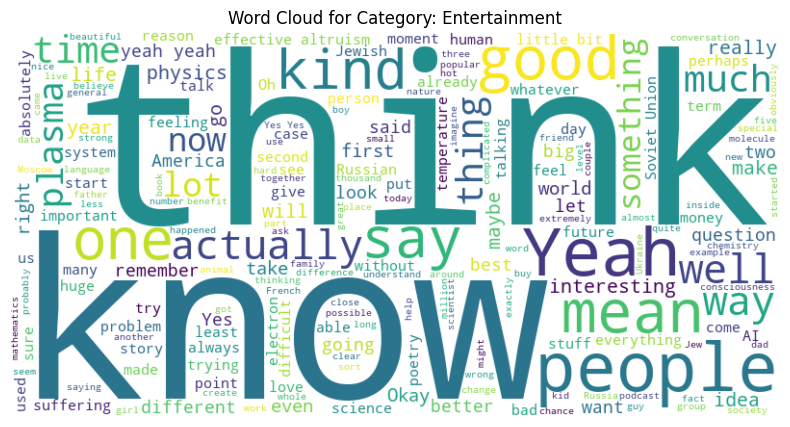

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

label_column = 'category_clean'  # Correct column name
unique_labels = df[label_column].unique()

for label in unique_labels:
    text = " ".join(df[df[label_column] == label]['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {label}')
    plt.axis("off")
    plt.show()



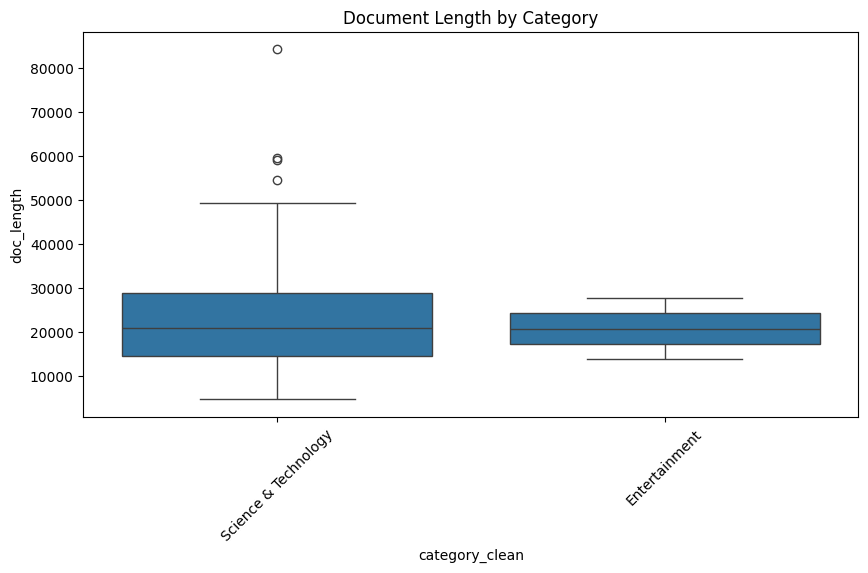

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='category_clean', y='doc_length', data=df)
plt.title("Document Length by Category")
plt.xticks(rotation=45)
plt.show()

In [23]:
df['title'].head(5).tolist()



['Jed Buchwald: Isaac Newton and the Philosophy of Science | Lex Fridman Podcast #214',
 'Sergey Nazarov: Chainlink, Smart Contracts, and Oracle Networks | Lex Fridman Podcast #181',
 'Stephen Wolfram: Fundamental Theory of Physics, Life, and the Universe | Lex Fridman Podcast #124',
 'Philip Goff: Consciousness, Panpsychism, and the Philosophy of Mind | Lex Fridman Podcast #261',
 'Oriol Vinyals: DeepMind AlphaStar, StarCraft, and Language | Lex Fridman Podcast #20']

In [24]:
# Simulate a date range from Jan 2021 to June 2024
num_rows = len(df)
df['publish_date'] = pd.date_range(start="2021-01-01", end="2024-06-01", periods=num_rows)
df['year_month'] = df['publish_date'].dt.to_period('M')

<Axes: title={'center': 'Smoothed Episode Frequency (3-Month Rolling Average)'}, xlabel='year_month'>

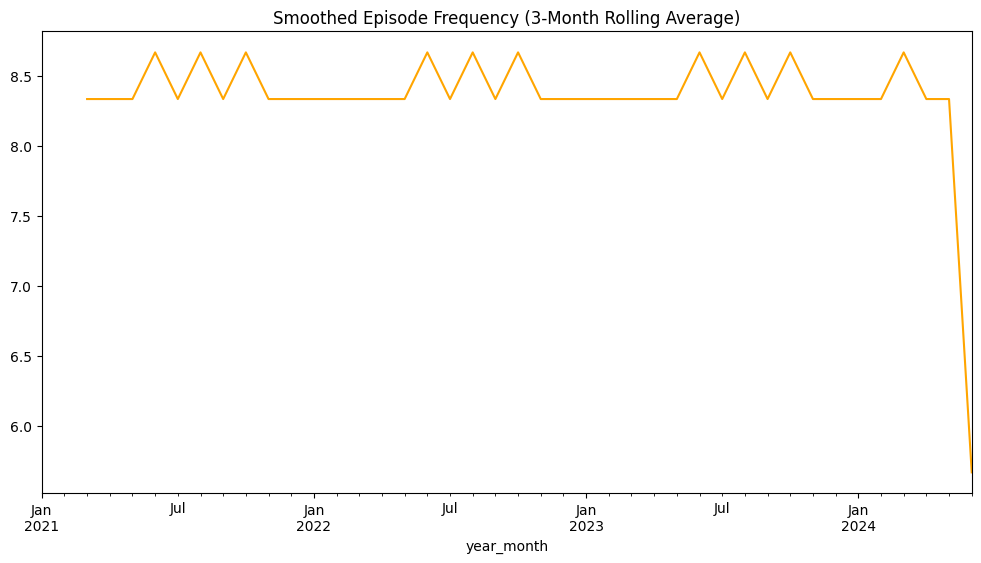

In [27]:
episodes_per_month.rolling(window=3).mean().plot(
    figsize=(12,6), title="Smoothed Episode Frequency (3-Month Rolling Average)", color='orange'
)


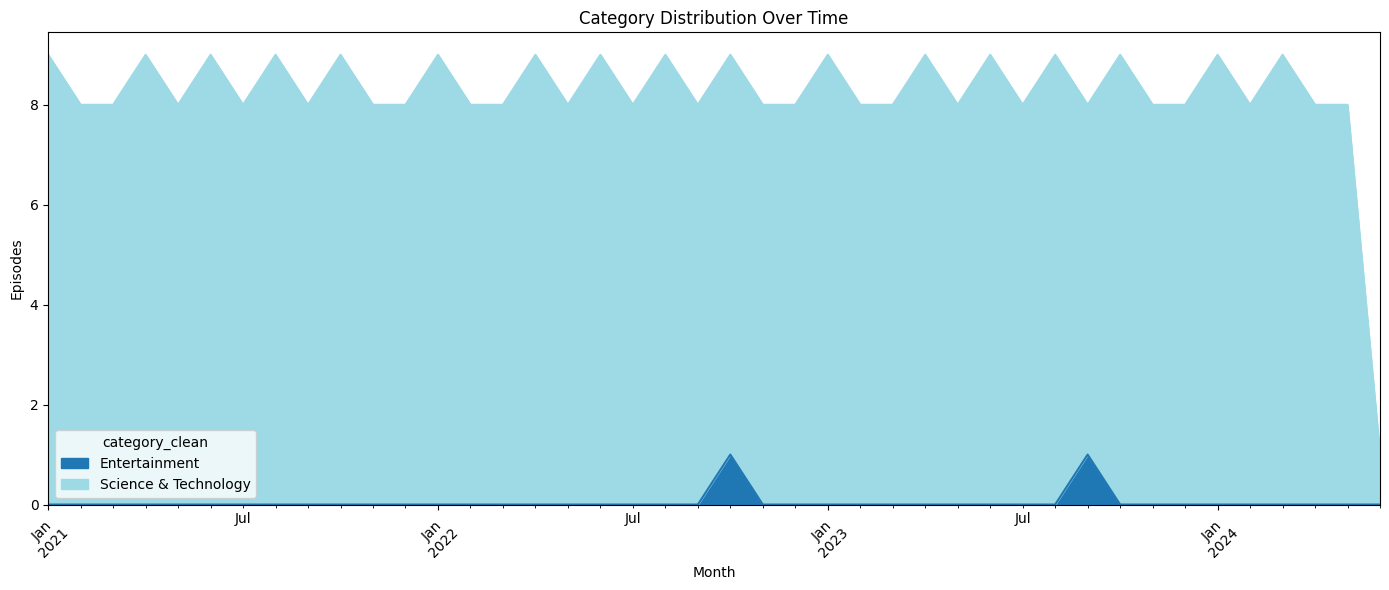

In [29]:
trend_by_cat = df.groupby(['year_month', 'category_clean']).size().unstack(fill_value=0)

trend_by_cat.plot.area(stacked=True, figsize=(14,6), colormap='tab20')
plt.title("Category Distribution Over Time")
plt.ylabel("Episodes")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
# Episode transcript length in words
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Summary stats of word count
print(df['word_count'].describe())


count      346.000000
mean     22459.283237
std      10654.022341
min       4740.000000
25%      14570.500000
50%      21005.500000
75%      28862.250000
max      84182.000000
Name: word_count, dtype: float64


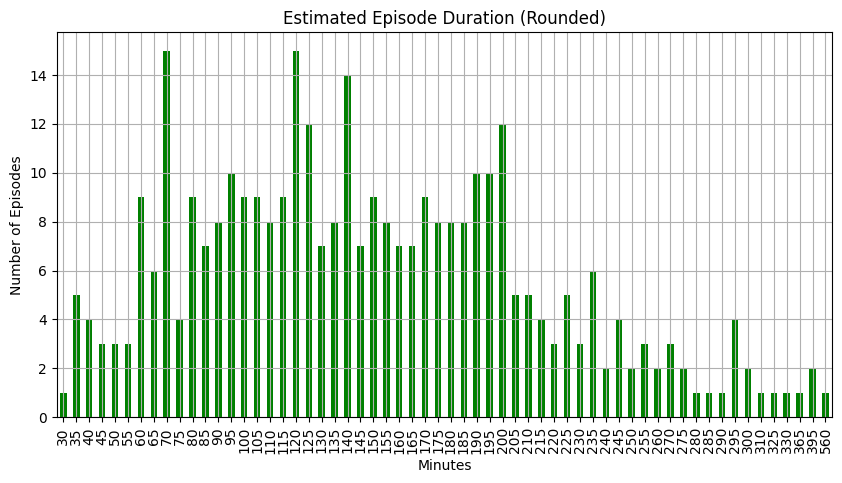

In [32]:
df['duration_minutes'] = df['word_count'] / 150

# Optional: round to nearest 5 mins
df['duration_minutes_rounded'] = df['duration_minutes'].apply(lambda x: round(x / 5) * 5)

# Show distribution
df['duration_minutes_rounded'].value_counts().sort_index().plot(kind='bar', figsize=(10,5), color='green')
plt.title("Estimated Episode Duration (Rounded)")
plt.xlabel("Minutes")
plt.ylabel("Number of Episodes")
plt.grid(True)
plt.show()


In [30]:
# === Extract Clean Category ===
df['category_clean'] = df['categories'].astype(str).str.extract(r"\['(.+?)'\]")

# === Save Enhanced Preprocessed File ===
df.to_csv("data/processed/lex_fridman_cleaned.csv", index=False)
print("✅ Enhanced cleaned file updated at: data/processed/lex_fridman_cleaned.csv")

✅ Enhanced cleaned file updated at: data/processed/lex_fridman_cleaned.csv
